In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# os.chdir('U:/Desktop/AOC_2022/')

small = False

if small:
    with open('input9_small2.txt') as f:
        data = f.read().splitlines()
else:
    with open('input9.txt') as f:
        data = f.read().splitlines()


In [3]:
def walk(dir,x,y): #walk movement for head
    if dir == 'R':
        x += 1
    elif dir == 'L':
        x -= 1
    elif dir == 'U':
        y += 1
    elif dir == 'D':
        y -= 1

    return x,y

def distance(x_H,y_H,x_T,y_T):
    return(np.sqrt(pow(x_H-x_T,2) + pow(y_H-y_T,2)))

def follow(x_H,y_H,x_T,y_T):
    if x_H != x_T and y_H != y_T: # not same row/column : move diagonal
        x_T,y_T = walk_diagonal(x_H,y_H,x_T,y_T)
    elif x_H == x_T and y_H != y_T:
        if y_H > y_T: #same column but lower: move up 
            y_T += 1
        elif y_H < y_T: #same column but higher: move down
            y_T -=1
    elif x_H != x_T and y_H == y_T:
        if x_H > x_T: #same row but lower: move up 
            x_T += 1
        elif x_H < x_T: #same row but higher: move down
            x_T -=1
    return x_T,y_T

def walk_diagonal(x_H,y_H,x_T,y_T):
    if x_H > x_T and y_H > y_T: #up and right
        x_T += 1
        y_T += 1
    elif x_H > x_T and y_H < y_T: #down and right
        x_T +=1
        y_T -=1
    elif x_H < x_T and y_H > y_T: #up and left
        x_T -= 1
        y_T += 1
    elif x_H < x_T and y_H < y_T: #down and left
        x_T -= 1
        y_T -= 1
    return x_T,y_T
    

Answer 1: 5683


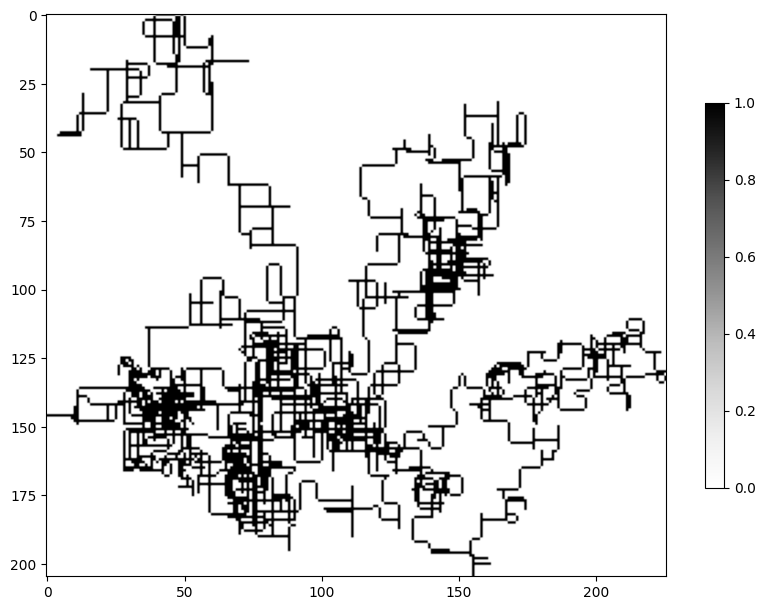

Answer 2: 2372


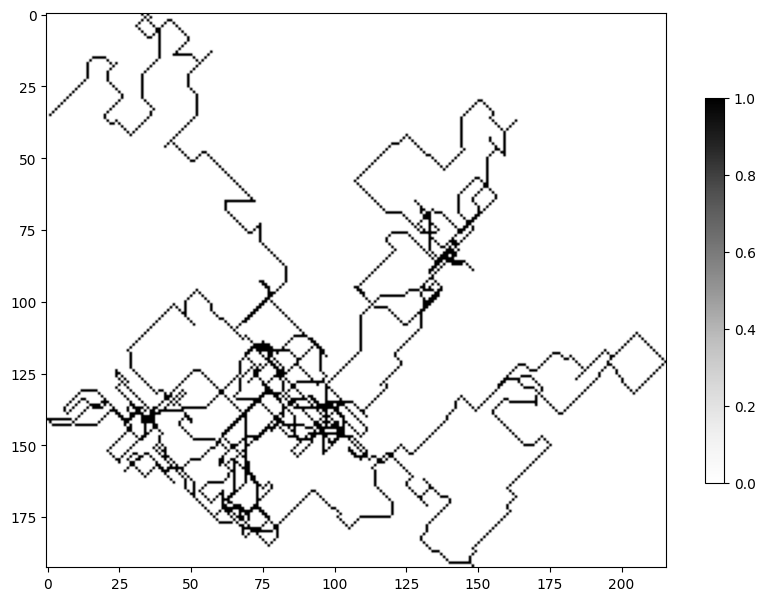

In [4]:
for part,length in enumerate([2,10]):
    coord_dict = {0:(0,0)}
    for i in range(length):
        coord_dict[i] = (0,0)

    positions_visited = [(0,0)]

    for i in data:
        (dir,stepsize) = i.split(' ')
        for j in range(int(stepsize)):
            coord_dict[0] = walk(dir,coord_dict[0][0],coord_dict[0][1])
            for k in range(1,len(coord_dict)):                    
                if ((coord_dict[k-1][0] == coord_dict[k][0]) or (coord_dict[k-1][1] == coord_dict[k][1])) and (distance(coord_dict[k-1][0],coord_dict[k-1][1],coord_dict[k][0],coord_dict[k][1]) > 1):  #same row/column + distance > 1
                    coord_dict[k] = follow(coord_dict[k-1][0],coord_dict[k-1][1],coord_dict[k][0],coord_dict[k][1]) 
                elif ((coord_dict[k-1][0] != coord_dict[k][0]) or (coord_dict[k-1][1] != coord_dict[k][1])) and (distance(coord_dict[k-1][0],coord_dict[k-1][1],coord_dict[k][0],coord_dict[k][1]) > np.sqrt(2)): #different row/column + distance > 1
                    coord_dict[k] = follow(coord_dict[k-1][0],coord_dict[k-1][1],coord_dict[k][0],coord_dict[k][1]) 

                if not coord_dict[len(coord_dict)-1] in positions_visited:
                    positions_visited.append(coord_dict[len(coord_dict)-1])
    print(f'Answer {part+1}: {len(positions_visited)}')
    min_x = min([i[0] for i in positions_visited])
    max_x = max([i[0] for i in positions_visited])
    min_y = min([i[1] for i in positions_visited])
    max_y = max([i[1] for i in positions_visited])

    postions_array = np.zeros((max_y-min_y+1,max_x-min_x+1))

    for x in positions_visited:
        postions_array[x[1]+abs(min_y),x[0]+abs(min_x)] = 1

    fig, ax = plt.subplots(figsize=(10,10))
    im = plt.imshow(np.flip(postions_array, axis=0),cmap='Greys')
    cbar = ax.figure.colorbar(im,
                            ax=ax,
                            shrink=0.5)
    plt.show()